In [1]:
"""
Created on Thu Mar  9 16:29:14 2023

@author: dekrk
"""
# STEP1 FRAME PROBLEM:
#Perform clusteri analysis (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
# Make inferences from the clusters obtained.
# STEP2 COLECT READ DATA
import pandas as pd
df = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
# STEP3: renaming columns with special charecters
df.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)
# setting index id as ID
df.set_index('ID',inplace=True)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


##
Data Description:
We have information on passengers who belong to an airline’s frequent flier program. 
For each passenger the data include information on their mileage history and on 
different ways they accrued or spent miles in the last year. The goal is to try to 
identify clusters of passengers that have similar characteristics for the purpose of
targeting different segments for different types of mileage offers
ID --Unique ID
Balance--Number of miles eligible for award travel
Qual_mile--Number of miles counted as qualifying for Topflight status
cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:
(1 = under 5,000 | 2 = 5,000 - 10,000 | 3 = 10,001 - 25,000 | 4 = 25,001 - 50,000 |5 = over 50,000)
Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months
Bonus_trans--Number of non-flight bonus transactions in the past 12 months
Flight_miles_12mo--Number of flight miles in the past 12 months
Flight_trans_12--Number of flight transactions in the past 12 months
Days_since_enrolled--Number of days since enrolled in flier program
Award--whether that person had award flight (free flight) or not

Data Exploration :
    Descriptive Statistics

In [3]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [5]:
#all values are  continous

In [6]:
df.isnull().sum().value_counts 

<bound method IndexOpsMixin.value_counts of Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64>

In [7]:
#NO NULL VALUES

In [8]:
df.duplicated().sum()

1

In [9]:
#NO DUPLICATE VALUES no null value so we perform eda

## -----Exploratory Data Analysis-------

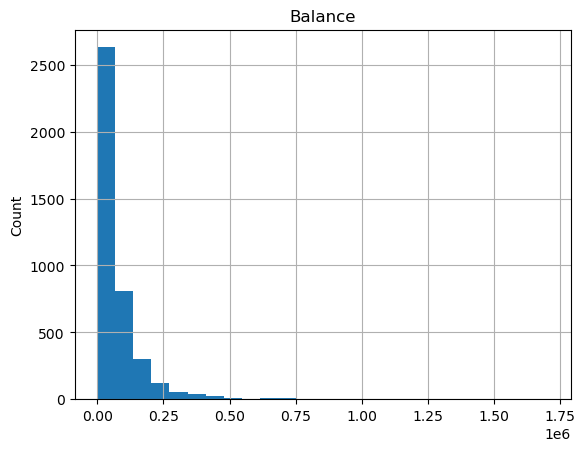

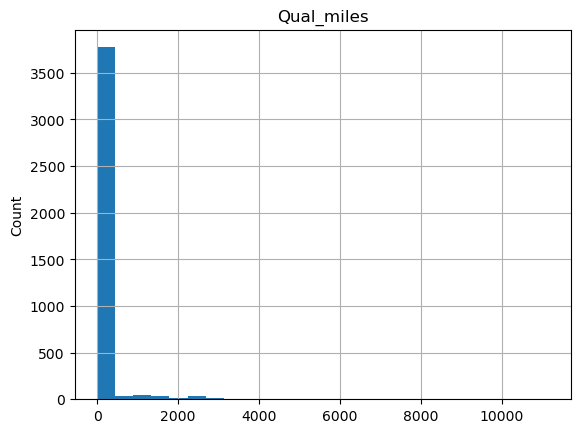

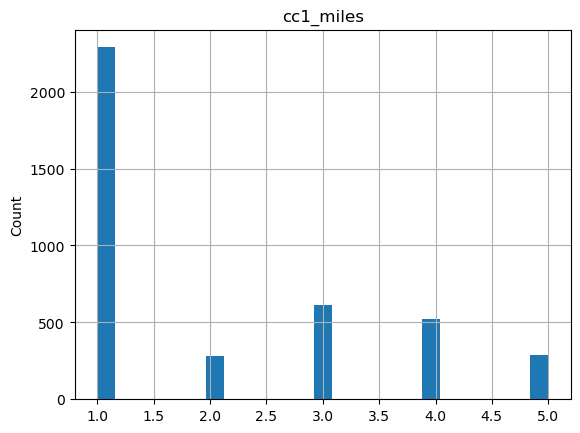

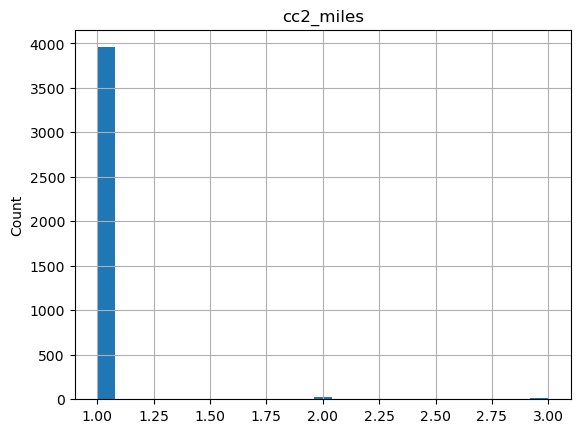

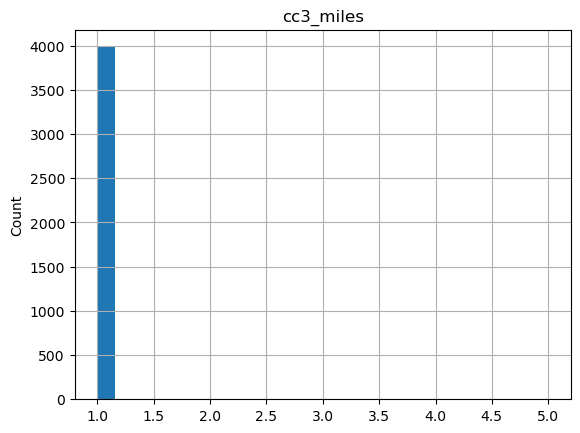

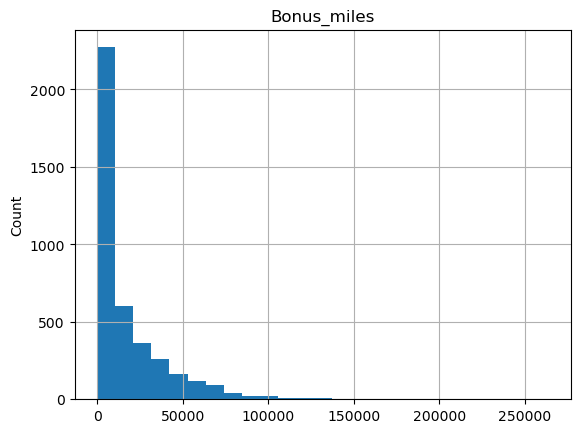

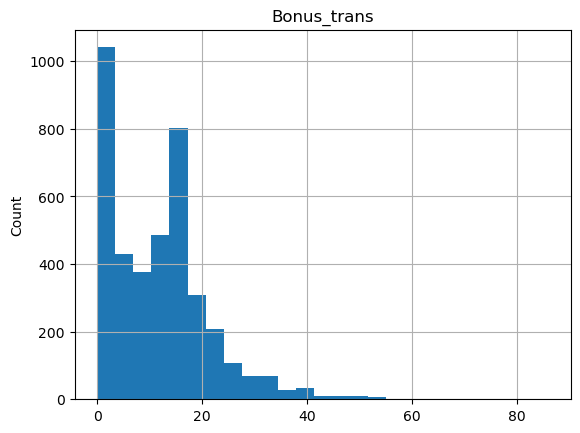

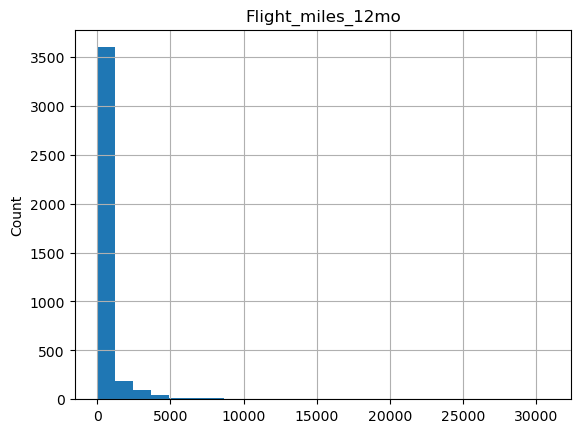

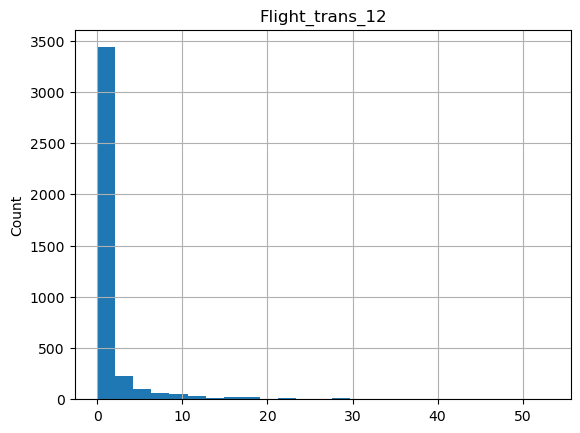

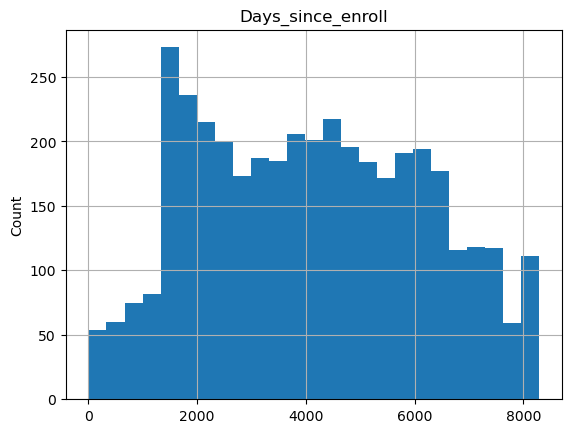

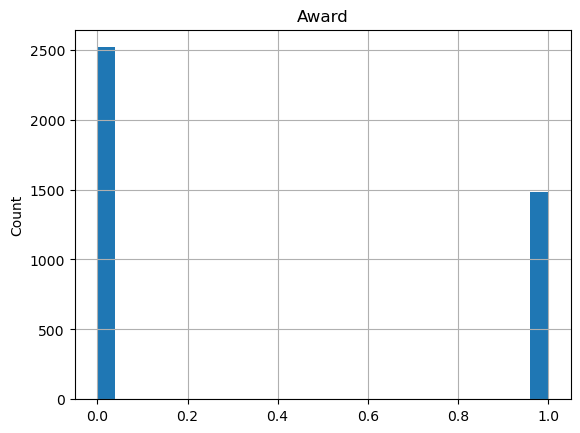

In [10]:
import matplotlib.pyplot as plt
for feature in df.columns:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

<Axes: >

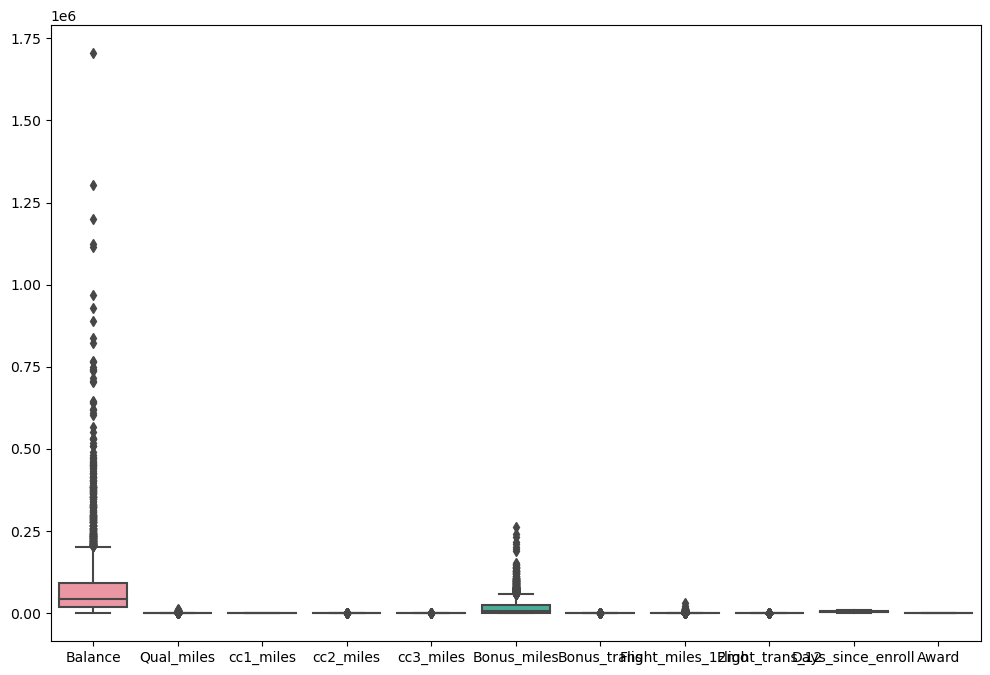

In [11]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.boxplot(data=df)# many outlier found in balance and bonus miles

Balance


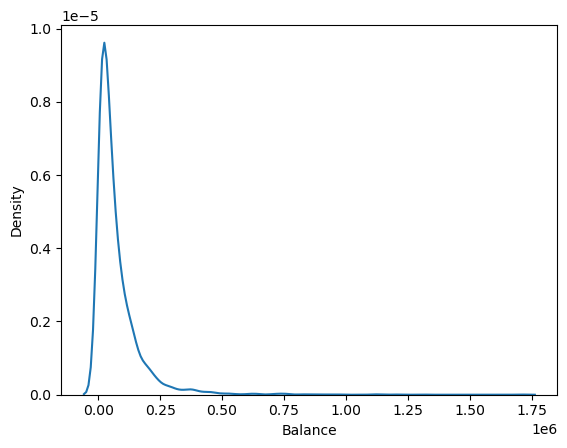

Qual_miles


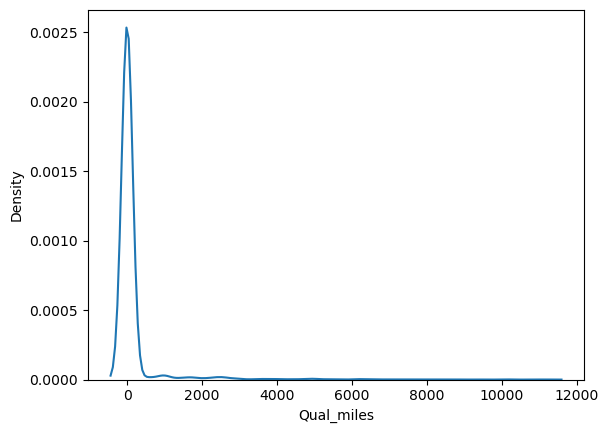

cc1_miles


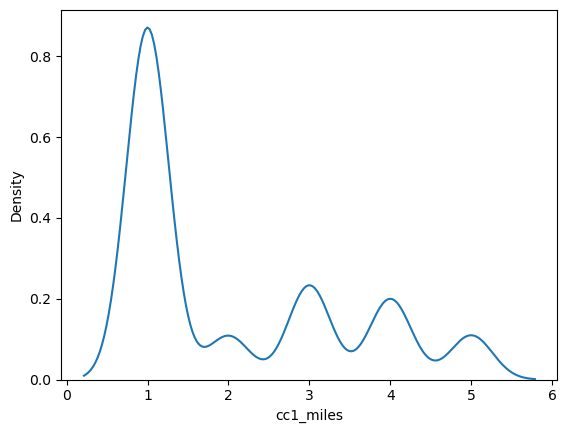

cc2_miles


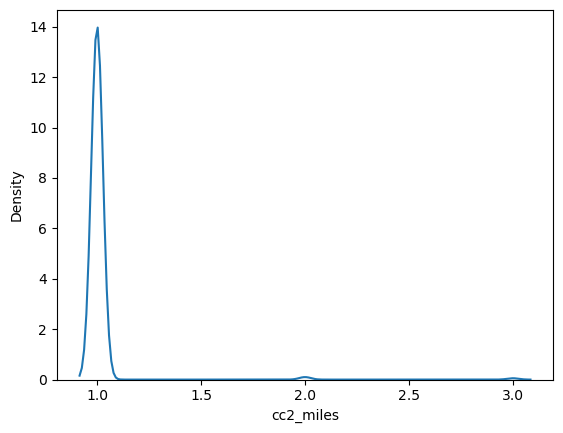

cc3_miles


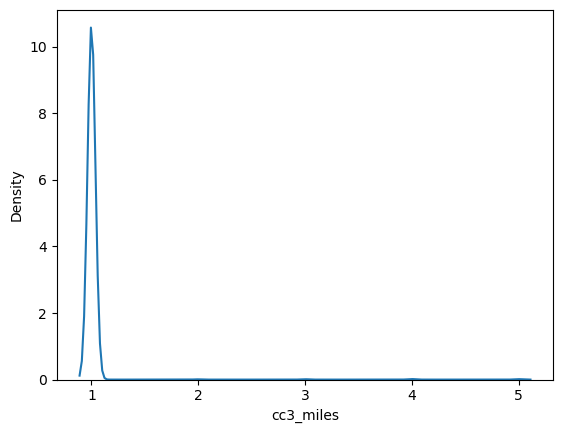

Bonus_miles


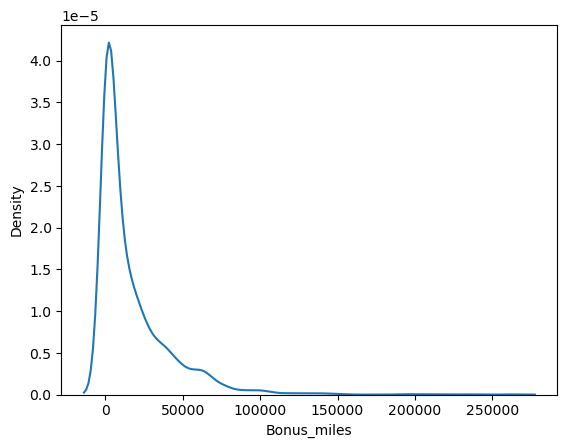

Bonus_trans


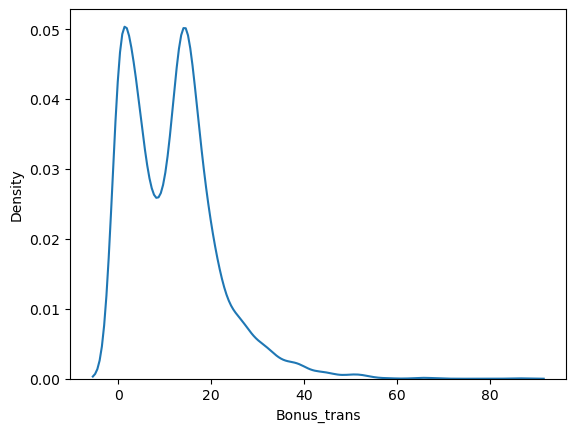

Flight_miles_12mo


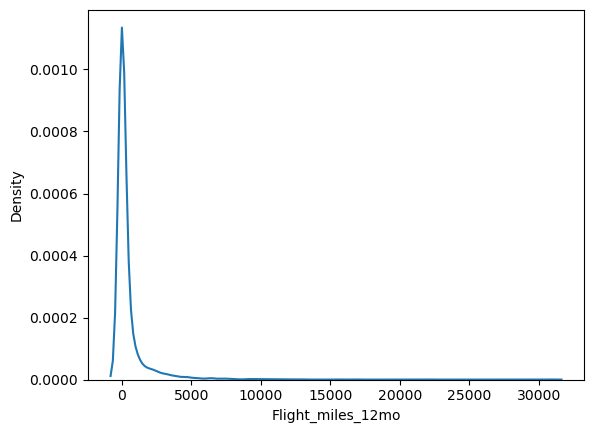

Flight_trans_12


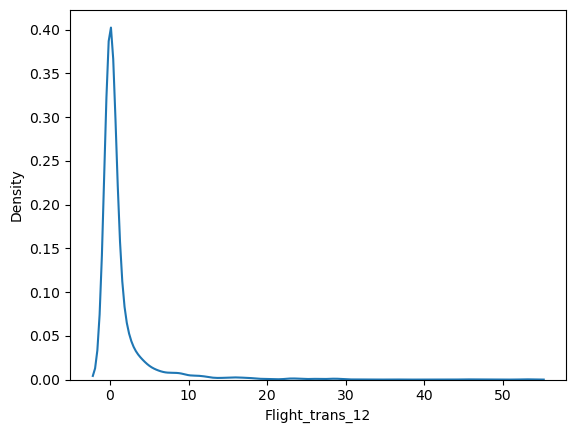

Days_since_enroll


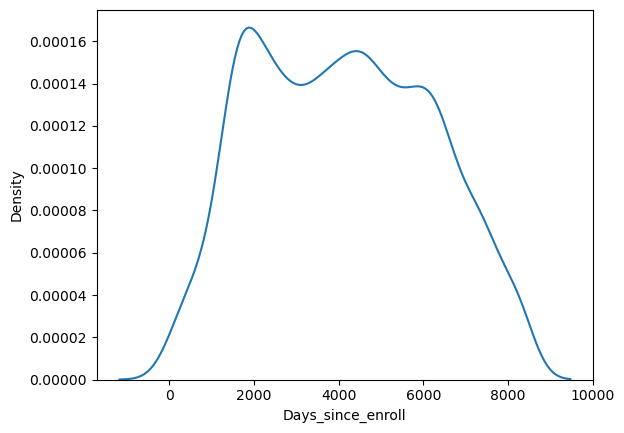

Award


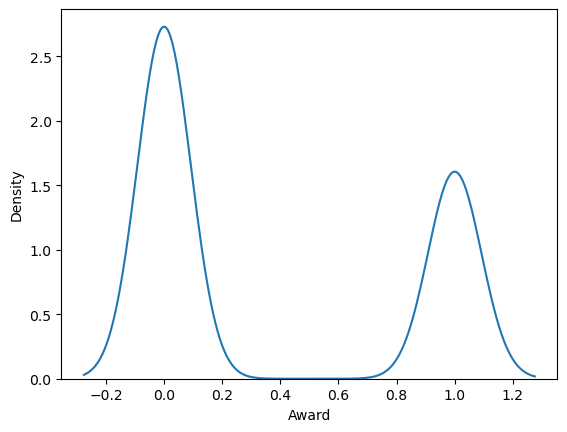

In [12]:
for n in df.columns:
    print(n)
    sns.kdeplot(df[n])
    plt.show()

## OUTLIER DETECTION
using squre root of data 

<Axes: >

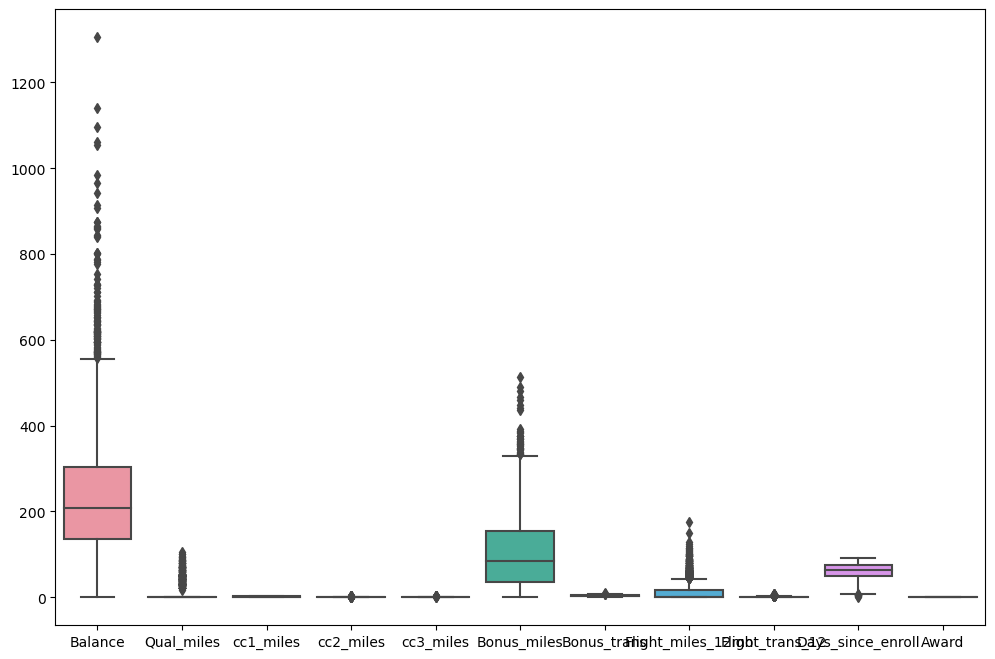

In [13]:
import numpy as np
plt.figure(figsize=(12,8))
sns.boxplot(data=np.sqrt(df))

In [14]:
#More observed outliers in flight miles, 12 months flight miles, days since enroll

<Axes: xlabel='Days_since_enroll'>

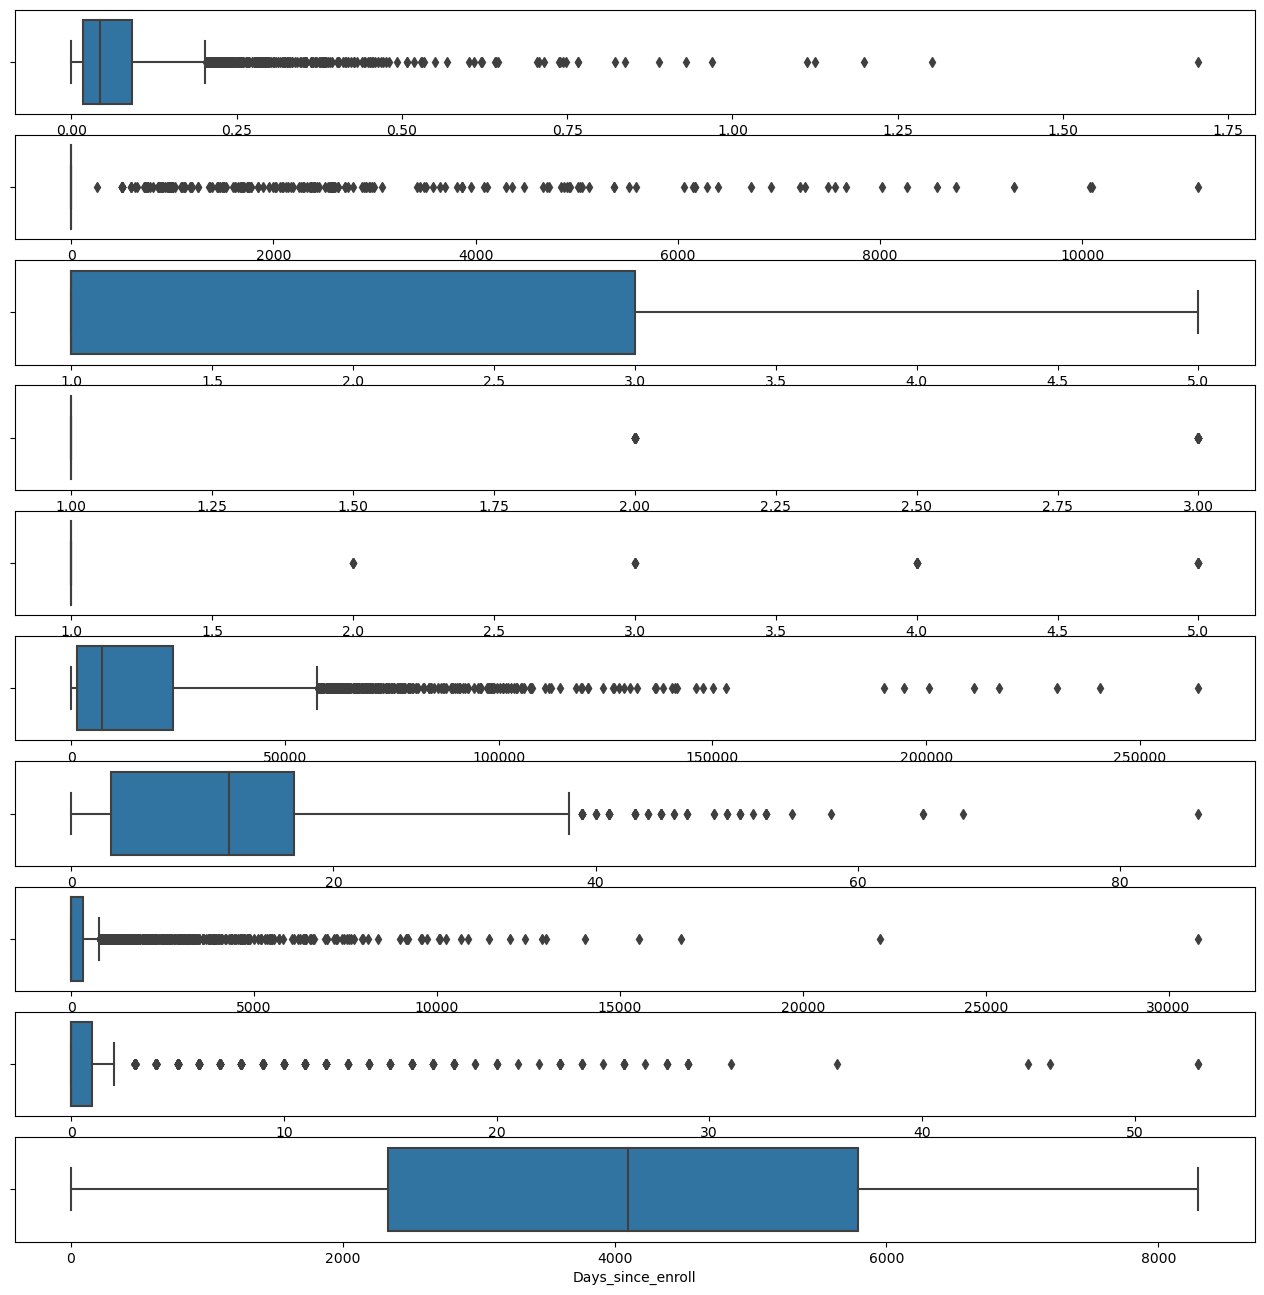

In [19]:
ot=df.copy() 
fig, axes=plt.subplots(10,1,figsize=(16,16),sharex=False,sharey=False)
sns.boxplot(x='Balance',data=ot,ax=axes[0])
sns.boxplot(x='Qual_miles',data=ot,ax=axes[1])
sns.boxplot(x='cc1_miles',data=ot,ax=axes[2])
sns.boxplot(x='cc2_miles',data=ot,ax=axes[3])
sns.boxplot(x='cc3_miles',data=ot,ax=axes[4])
sns.boxplot(x='Bonus_miles',data=ot,ax=axes[5])
sns.boxplot(x='Bonus_trans',data=ot,ax=axes[6])
sns.boxplot(x='Flight_miles_12mo',data=ot,ax=axes[7])
sns.boxplot(x='Flight_trans_12',data=ot,ax=axes[8])
sns.boxplot(x='Days_since_enroll',data=ot,ax=axes[9])

## -------Data Visualization----------

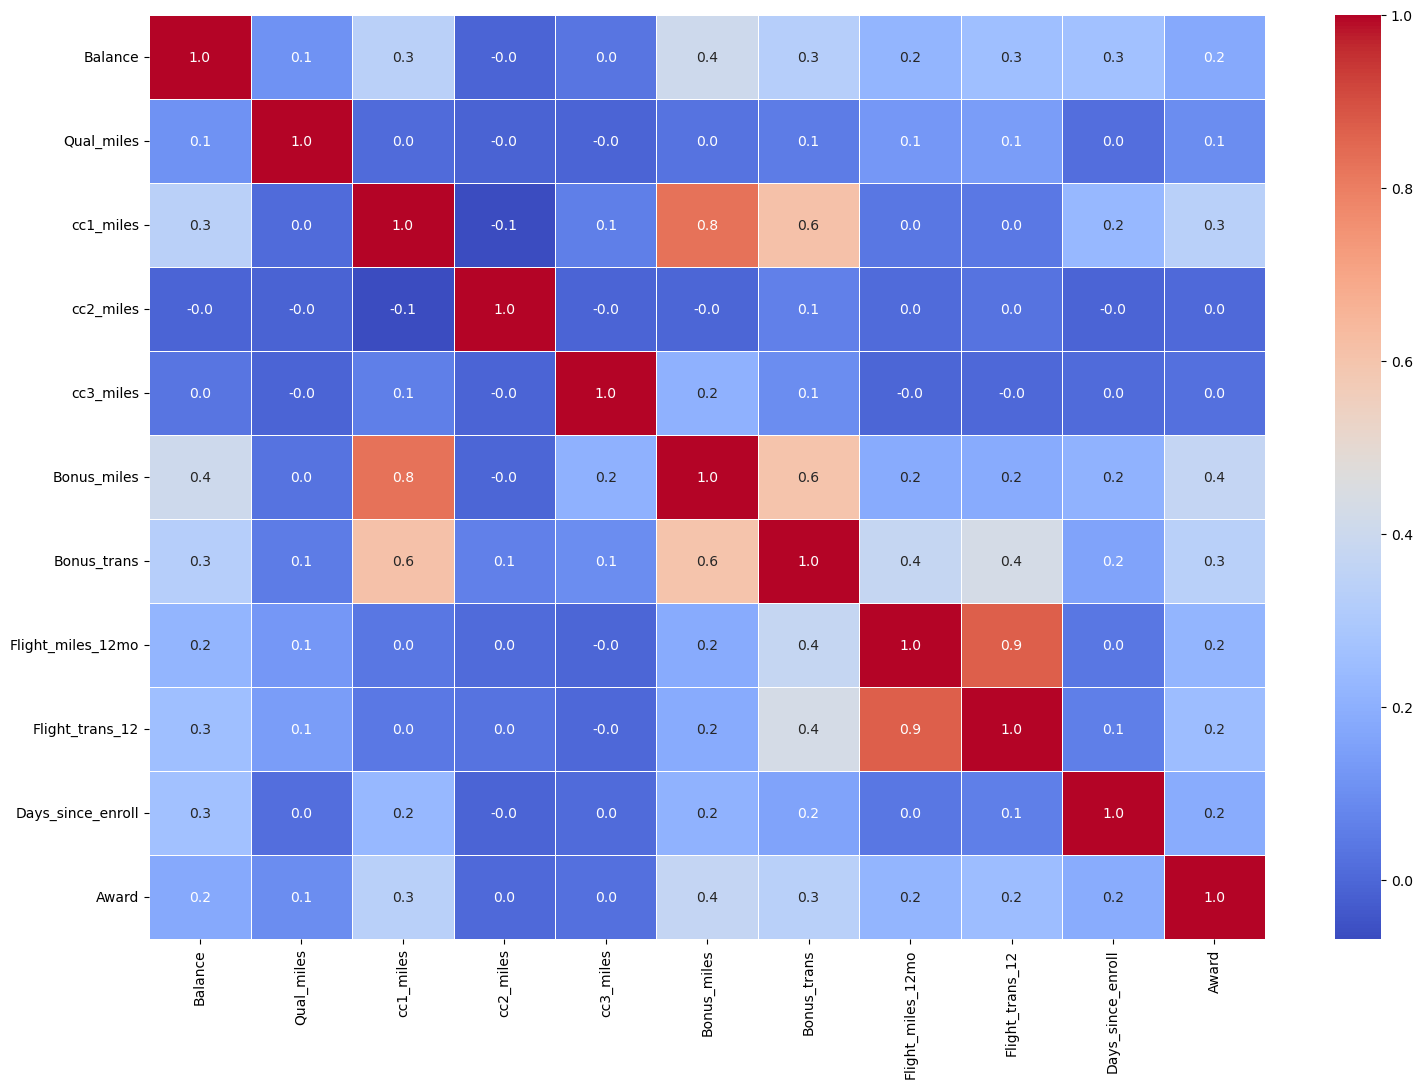

In [20]:
#Corelation Analysis
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=True, linewidths =.5, fmt ='.1f',cmap="coolwarm")
plt.show()

Observations from this correlation matrix:

flight_trans_12 is positively correlated with flight_miles_12mo

bonus_trans is positively correlated with cc1_miles and  bonus_miles

bonus_miles is positively correlated with cc1_miles

# standardising the data before applying k means model

In [26]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(df)
std_df.shape

(3999, 11)

In [27]:
#Normalizing the data using Minmaxscaler for accurate result comparison

minmax = MinMaxScaler()
minmax_df = minmax.fit_transform(df)
minmax_df.shape

(3999, 11)

In [48]:
#  PCA on minmax_df
from sklearn.decomposition import PCA
pca_minmax =  PCA(random_state=10, n_components=0.95)
pca_minmax_df = pca_minmax.fit_transform(minmax_df)
# eigenvalues

print(pca_minmax.singular_values_)

[32.61670755 20.38332523 14.95110164  6.55157753]


In [28]:
# ------kmeans model building------------
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
kmeans=KMeans().fit(std_df)
score=[]
K=range(1,20)

for i in K:
    kmeans=KMeans(n_clusters=i,init="k-means++",random_state=3,n_init='auto')
    kmeans.fit(std_df)
    score.append(kmeans.inertia_)

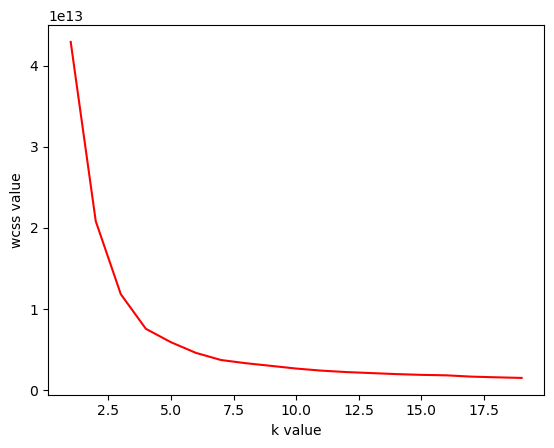

In [23]:
#visualize using the Elbow Graph to find optimum number of  clusters (K value) from K values rang;
import matplotlib.pyplot as plt
plt.plot(K,score,color="red")
plt.xlabel("k value")
plt.ylabel("wcss value") # within-cluster sum-of-squares criterion 
plt.show()

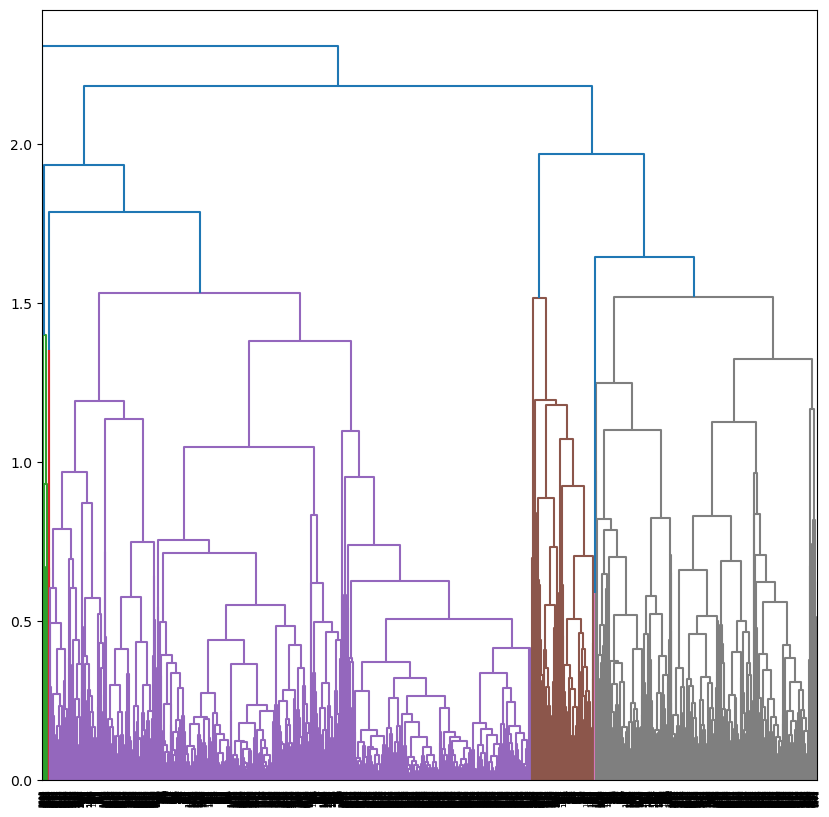

In [32]:
# Create Dendrograms
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 10))  
dendograms=sch.dendrogram(sch.linkage(minmax_df,'complete'))

In [39]:
# Create Clusters (y)
from sklearn.cluster import AgglomerativeClustering
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [40]:
y=pd.DataFrame(hclusters.fit_predict(minmax_df),columns=['clustersid'])
y['clustersid'].value_counts()

1    1011
0     946
2     808
4     699
3     535
Name: clustersid, dtype: int64

In [42]:
# Adding clusters to dataset
df['clustersid']=hclusters.labels_
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,1
2,19244,0,1,1,1,215,2,0,0,6968,0,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,1
4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
4018,64385,0,1,1,1,981,5,0,0,1395,1,0
4019,73597,0,3,1,1,25447,8,0,0,1402,1,0


In [43]:
#grouping by clusters
df.groupby('clustersid').agg(['mean']).reset_index()

,clustersid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,79848.233615,285.097252,1.699789,1.024313,1.000000,12079.774841,12.133192,781.939746,2.369979,4372.173362,1.0
1,1,43313.653808,21.506429,1.000000,1.033630,1.000989,2562.614243,5.474777,169.510386,0.523244,4940.680514,0.0
2,2,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0.0
3,3,127475.028037,160.801869,4.362617,1.000000,1.050467,58656.919626,22.235514,991.110280,3.005607,5072.226168,1.0
4,4,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0.0


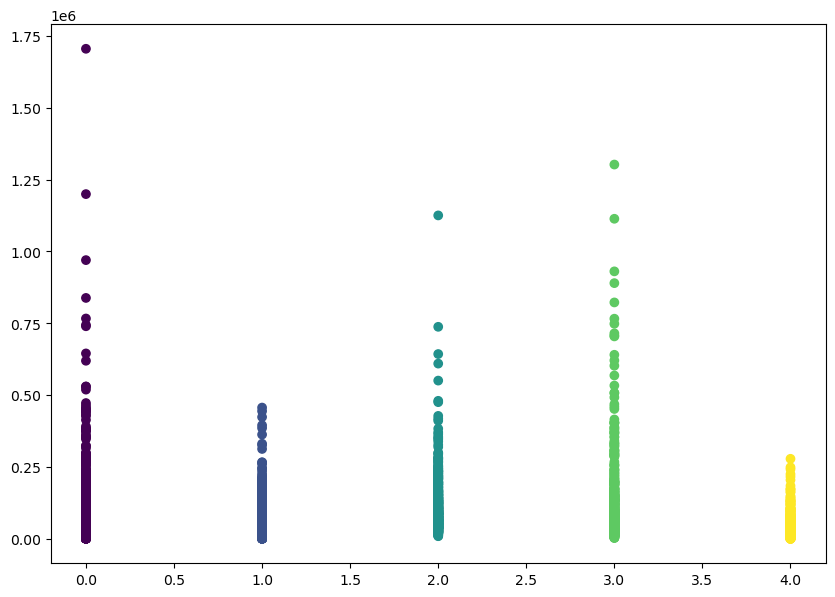

In [44]:
# Plotting the Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(df['clustersid'],df['Balance'], c=hclusters.labels_) 

##Conclusion

I applied EDA to analyze dataset.correlation between diff variables was observed and found no colinearity.
Applied Standardazation & MinMaxScalar transformation on the data to use Principle componets analysis effectively.
Used & analyzed two clustering techniquesi) KMeans & ii) Hierarchical Clusterig.
KMeans clustering is sensitive to outliers